# Huffpost news analyze

### Group O COMP7630 Project

1. Dataset

    This dataset contains around 240k news headlines from 2012 to 2025 from HuffPost. Based on kaggle dataset (2012-2022) and new post scrapped directly from Huffpost.com (2022 - 2025). It's one of the biggest news datasets and can serve as a benchmark for a variety of tasks.

    Each record in the dataset consists of the following attributes:

    * category: category in which the article was published. 
    * headline: the headline of the news article. 
    * authors: list of authors who contributed to the article. 
    * link: link to the original news article. 
    * short_description: Abstract of the news article. 
    * date: publication date of the article. 
    
    example: 
    ```json
    {
        "link": "https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9",
        "headline": "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters", 
        "category": "U.S. NEWS",
        "short_description": "Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.",
        "authors": "Carla K. Johnson, AP",
        "date": "2022-09-23"
    }
    ```




### Environment Setup if running on Google Colab

In [ ]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')
json_path = '/content/drive/MyDrive/data/News_Category_Dataset_v3.json'
df = pd.read_json(json_path, lines=True)

### Environment Setup local

In [1]:
import pandas as pd


json_path = "./News_Category_Dataset_v3.json"

df = pd.read_json(json_path, lines=True)


In [2]:
# Verify the data
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
%pip install --upgrade nltk

import nltk
nltk.download('punkt', download_dir='./nltk_data/')
nltk.download('punkt_tab', download_dir='./nltk_data/')
nltk.download('stopwords', download_dir='./nltk_data/')
nltk.download('averaged_perceptron_tagger', download_dir='./nltk_data/')
nltk.download('wordnet', download_dir='./nltk_data/')
nltk.download('omw-1.4', download_dir='./nltk_data/') 

nltk.data.path.append('./nltk_data/')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to ./nltk_data/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./nltk_data/...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to ./nltk_data/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ./nltk_data/...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to ./nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ./nltk_data/...
[nltk_data]   Package omw-1.4 is already up-to-date!


2. Dataset Analysis and Data Preprocessing.

    1. Data Preprocessing
        * Sentence segmentation and tokenization
        * Remove URLs and email addresses
        * Stop word removal
        * Filter out short sentences

    2. Data Analysis (Analyze before and after preprocessing)
        * Analyze text length distribution
        * Analyze class distribution
        * Calculate keywords for each category
        * Generate word clouds for visualization
    

In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk

# Init
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

extra_stopwords = ['said', 'say', 'would', 'could', 'also', 'one', 'two', 'make', 'may',
                   'u', 'time', 'new']
stop_words.update(extra_stopwords)

print(stop_words)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

{'these', 'by', "hadn't", 'were', 'on', 'against', 'itself', 'it', 'the', 'their', "we've", "they'd", "won't", 'there', 'them', 'doesn', 'needn', 'below', 'then', 'other', "weren't", 'above', 'have', "didn't", 'shouldn', 'ain', 'him', 'i', 'is', 'me', 'she', 'theirs', 'and', 'after', 'aren', 'should', 'ours', "he's", 'o', 'in', 'before', "haven't", 'now', "she'd", "she'll", 'wouldn', "you'll", "we'll", 'yours', 'his', 'those', 'further', 'y', 're', 'off', 've', 'where', "shouldn't", 'between', 'when', "i'd", 'u', 'don', 'an', 'until', 'said', 'had', 'which', "you'd", 'two', 'no', 'new', 'also', 'hadn', 'both', "shan't", 'been', "should've", "that'll", "wouldn't", "mightn't", "couldn't", 'to', 'from', 'for', 'could', 'you', "needn't", "i've", 'won', 'would', "it'll", 'her', 'than', 'out', 'as', 'isn', 'about', 'hasn', "they've", 'being', 'while', 'll', 'am', 'any', 'through', 'again', 'how', 'himself', 'say', 'our', 'nor', 'd', 'yourself', 'do', 'who', 'not', 'if', "isn't", 's', 'can', 

In [5]:
# 1. Sentence segmentation and tokenization

df.dropna(subset=['headline', 'short_description'], inplace=True)

df['text'] = df['headline'] + ' ' + df['short_description'].fillna('')

df['cleaned_text'] = df['text'].apply(preprocess_text)

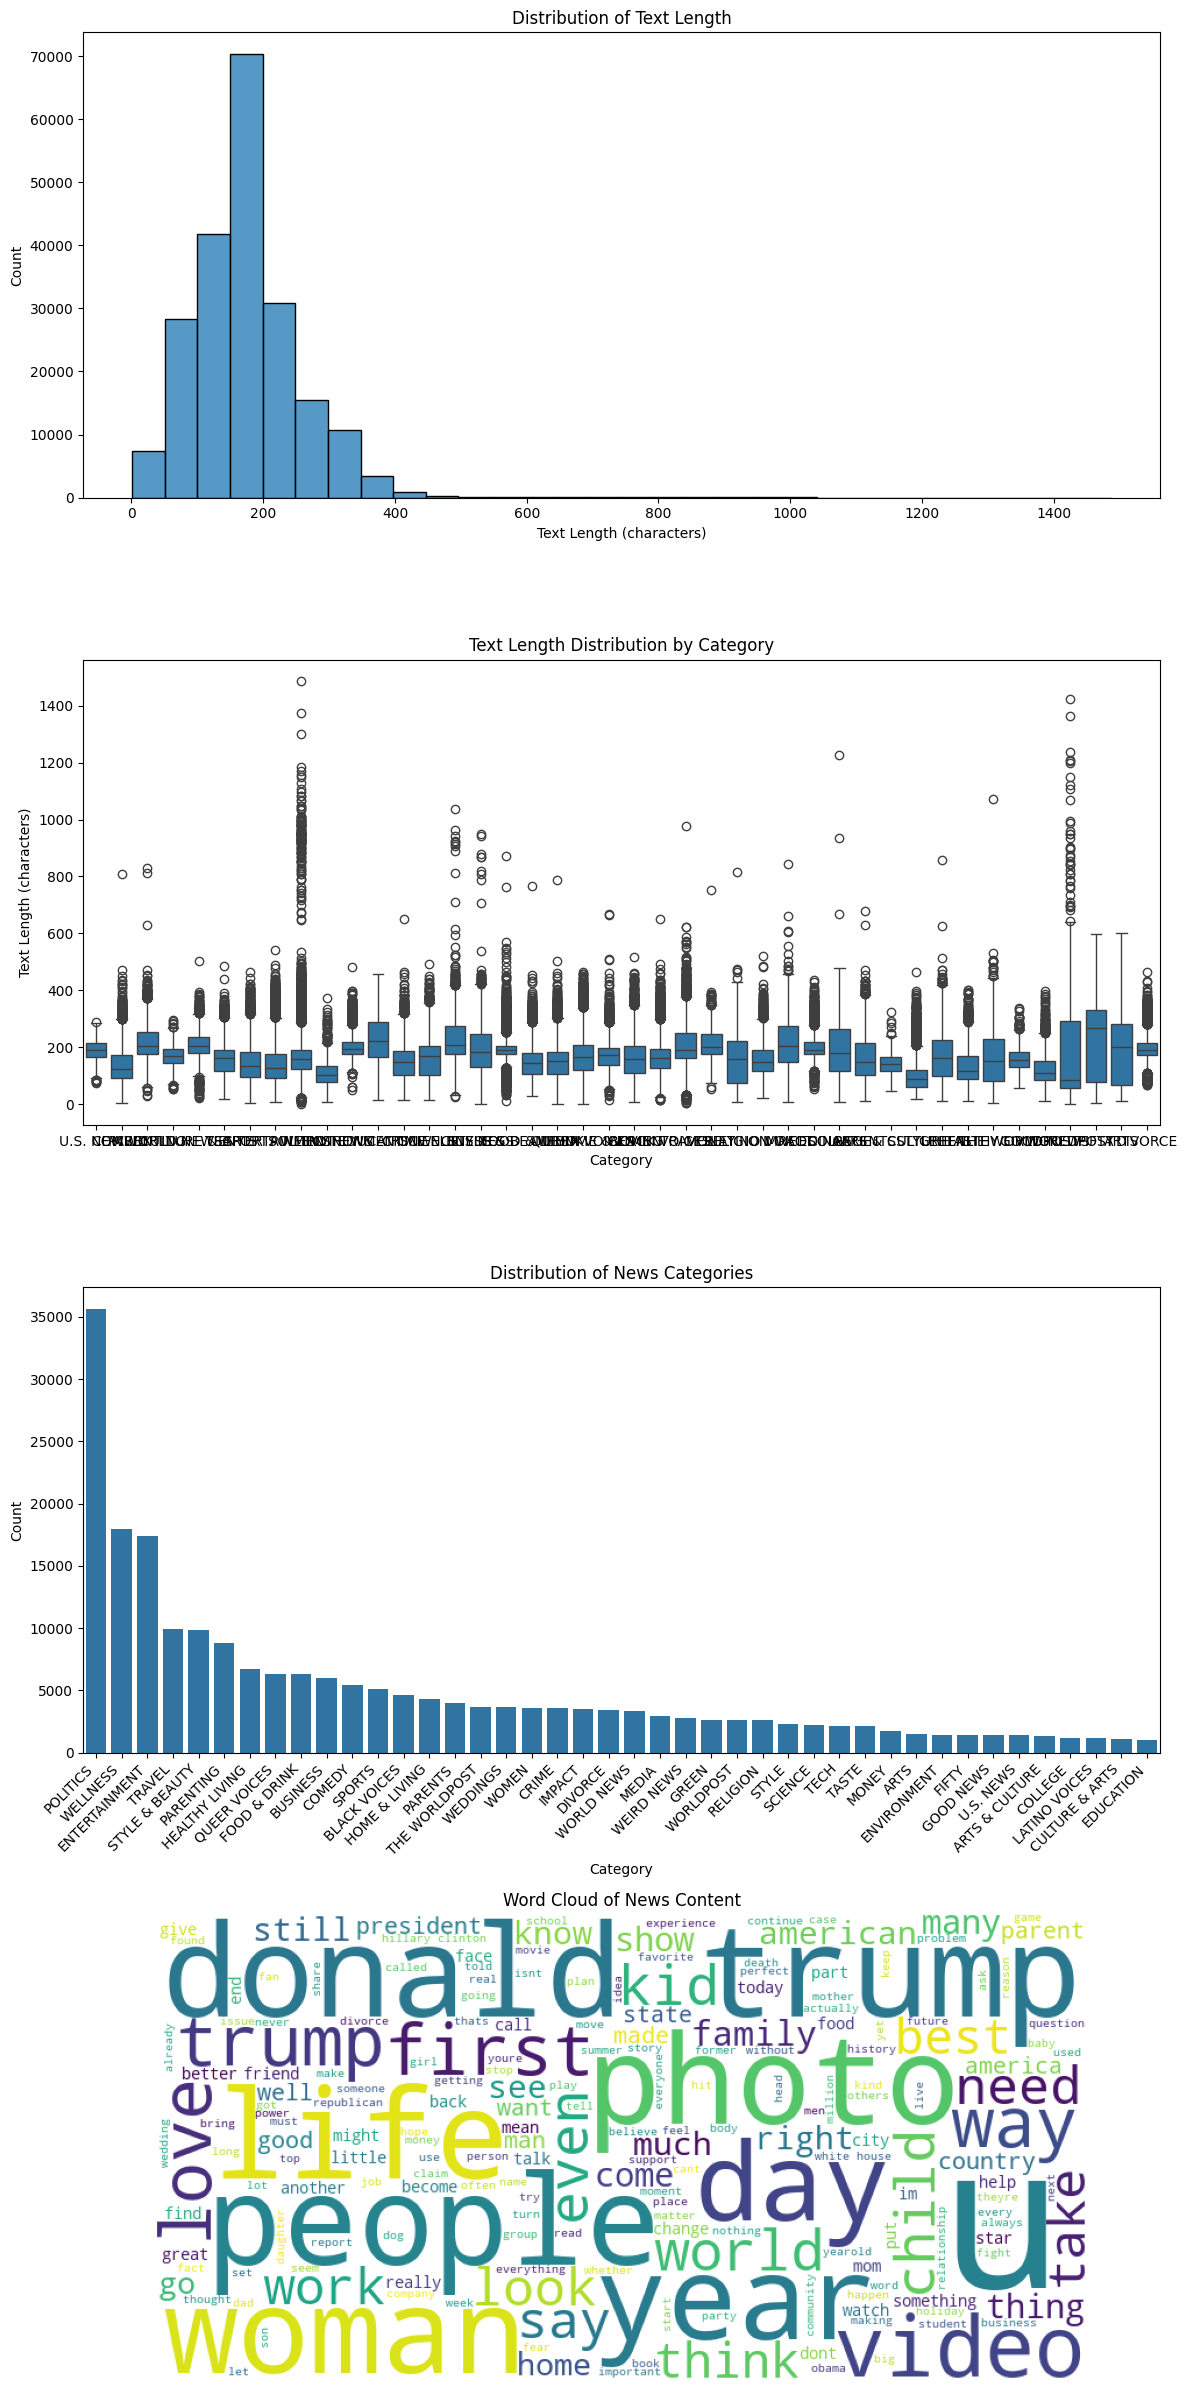

In [7]:
# 2. display the distribution of text length and category

import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['text'].str.len()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 24))

# Plot 1: Distribution of text length
sns.histplot(data=df, x='text_length', bins=30, ax=ax1)
ax1.set_title('Distribution of Text Length')
ax1.set_xlabel('Text Length (characters)')
ax1.set_ylabel('Count')

# Plot 2: Box plot of text length by category
sns.boxplot(data=df, x='category', y='text_length', ax=ax2)
ax2.set_title('Text Length Distribution by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Text Length (characters)')
plt.xticks(rotation=45, ha='right')  # Fixed: using plt.xticks instead of ax2.xticks


# Plot 3: 
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax3)
ax3.set_title('Distribution of News Categories')
ax3.set_xlabel('Category')
ax3.set_ylabel('Count')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 4: word cloud
from wordcloud import WordCloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
ax4.imshow(wordcloud)
ax4.set_title('Word Cloud of News Content')
ax4.axis('off')

plt.tight_layout()
plt.show()



In [8]:
# filter out low frequency words and short words

all_words = ' '.join(df['cleaned_text']).split()
word_counts = Counter(all_words)
min_freq = 5
min_length = 3
df['filtered_text'] = df['cleaned_text'].apply(
    lambda x: ' '.join([word for word in x.split()
    if word_counts[word] >= min_freq and len(word) >= min_length])
)

top_categories = df['category'].value_counts().head(15).index
df = df[df['category'].isin(top_categories)]

# 处理类别不平衡（示例：过采样）
from imblearn.over_sampling import RandomOverSampler
X = df['filtered_text']
y = df['category']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.to_frame(), y)
df_balanced = pd.DataFrame({'text': X_resampled['filtered_text'], 'category': y_resampled})

df_balanced.to_csv('preprocessed_news.csv', index=False)

C:\Users\fhq\AppData\Local\Temp\ipykernel_68688\495731687.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=ax2)


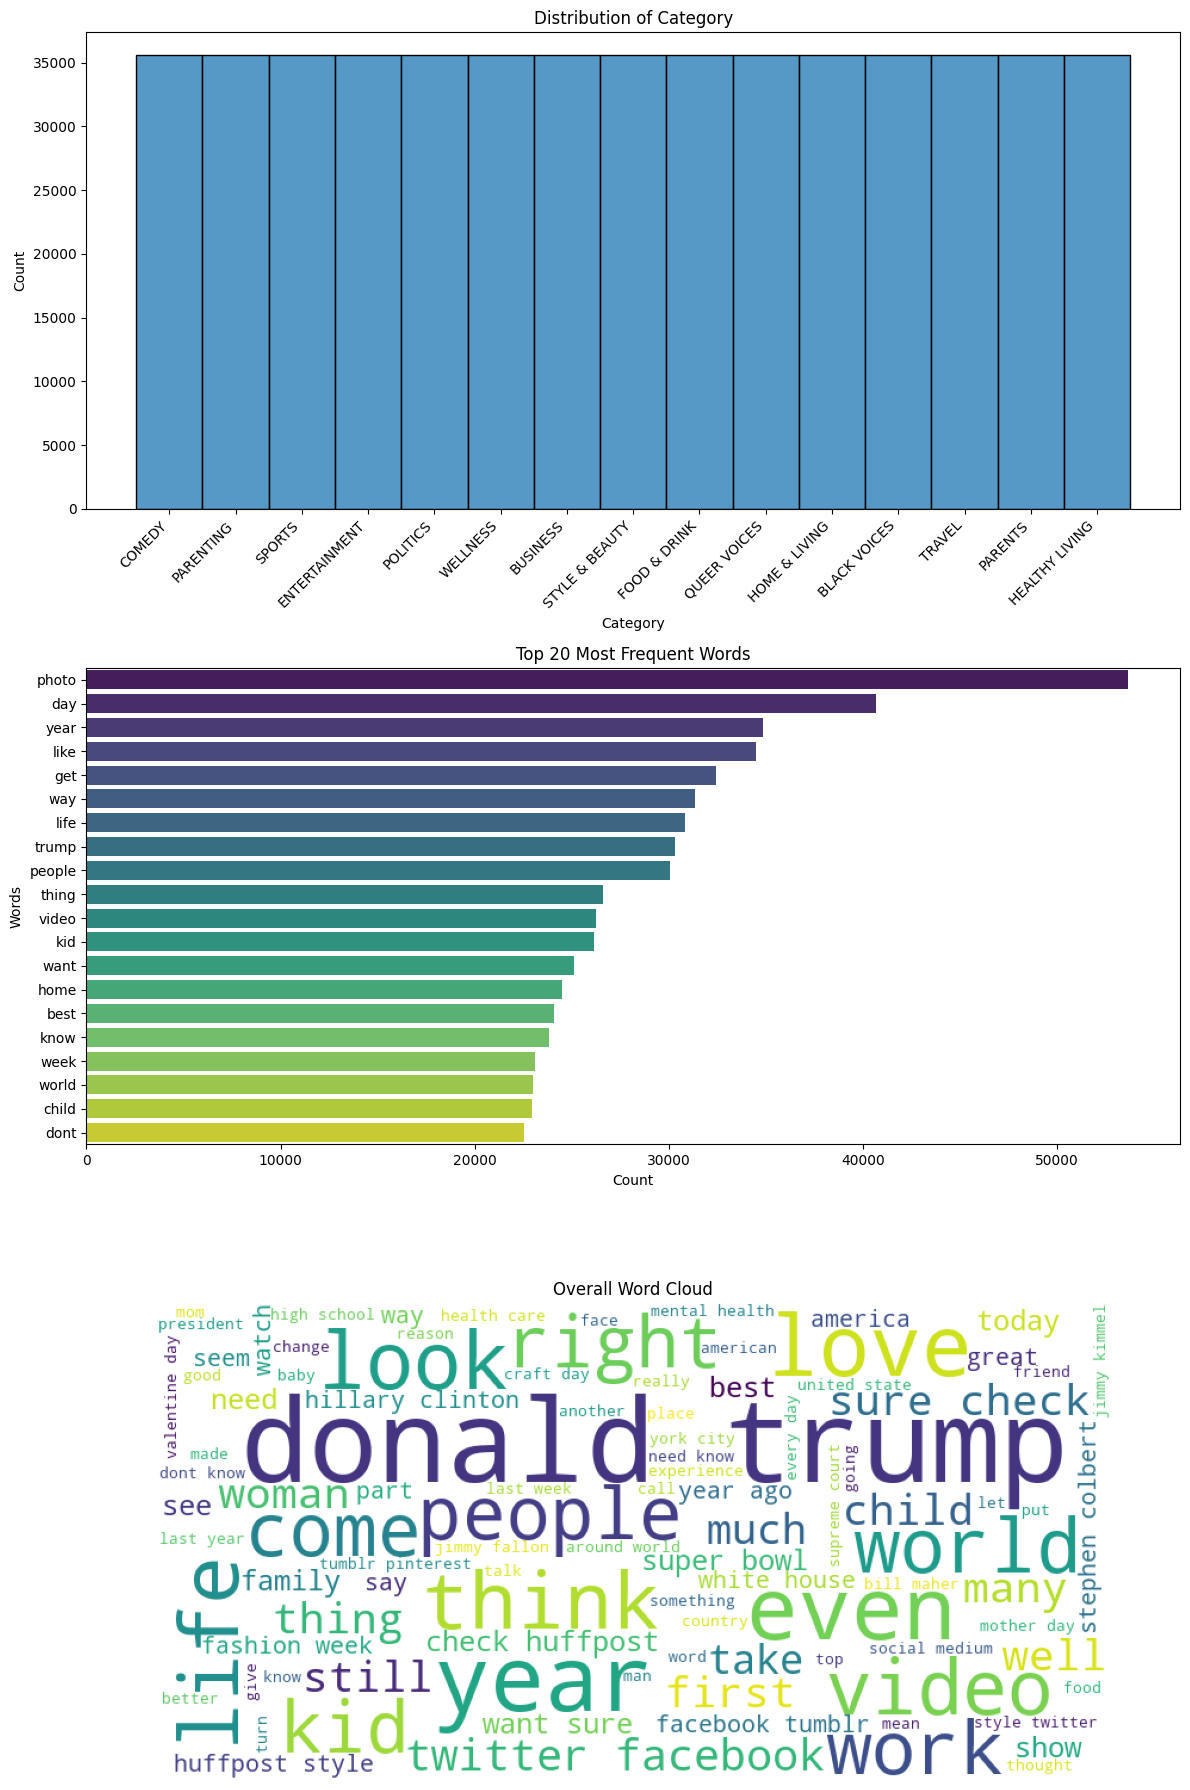

In [10]:
# display distribution after preprocessing

df_balanced['text_length'] = df_balanced['text'].str.len()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of category
sns.histplot(data=df_balanced, x='category', bins=30, ax=ax1)
ax1.set_title('Distribution of Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2: Top 20 words bar chart
all_words = ' '.join(df_balanced['text']).split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=ax2)
ax2.set_title('Top 20 Most Frequent Words')
ax2.set_xlabel('Count')
ax2.set_ylabel('Words')


# Plot 3: Overall word cloud visualization
text = ' '.join(df_balanced['text'])
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     max_words=100,
                     colormap='viridis').generate(text)

ax3.imshow(wordcloud)
ax3.set_title('Overall Word Cloud')
ax3.axis('off')

plt.tight_layout()
plt.show()


In [11]:
# Add dropdown to show top 15 frequent words by category
from ipywidgets import interact, Dropdown

def show_category_top_words(category):
    plt.figure(figsize=(10, 6))
    
    # Get text for selected category
    category_text = ' '.join(df_balanced[df_balanced['category'] == category]['text'])
    
    # Count word frequencies
    words = category_text.split()
    word_counts = Counter(words)
    
    # Get top 15 words
    top_words = word_counts.most_common(15)
    words, counts = zip(*top_words)
    
    # Create bar chart
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top 15 Most Frequent Words in Category: {category}')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.tight_layout()
    plt.show()

# This will create an interactive dropdown in the notebook
interact(show_category_top_words, 
         category=Dropdown(options=sorted(df_balanced['category'].unique()), 
                          description='Category:'))

interactive(children=(Dropdown(description='Category:', options=('BLACK VOICES', 'BUSINESS', 'COMEDY', 'ENTERT…

<function __main__.show_category_top_words(category)>

3. Topic Modeling

* LDA
* NMF
* CTM
* BERT

In [6]:
# init

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF, LatentDirichletAllocation
from bertopic import BERTopic
import pyLDAvis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Topic number
n_topics = 10

In [14]:
# 1. LSA (Latent Semantic Analysis)
print("Training LSA model...")

# 创建TF-IDF矩阵
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# 训练LSA模型
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_output = lsa_model.fit_transform(tfidf_matrix)

# 获取主题词
feature_names = tfidf_vectorizer.get_feature_names_out()
lsa_topics = {}
for topic_idx, topic in enumerate(lsa_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    lsa_topics[f"Topic {topic_idx+1}"] = top_words
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

Training LSA model...
Topic 1: trump, donald, day, photo, like, get, year, people, want
Topic 2: trump, donald, president, clinton, republican, gop, hillary, campaign, say
Topic 3: photo, style, check, twitter, huffpost, facebook, pinterest, tumblr, want
Topic 4: photo, day, trump, best, look, week, year, recipe, donald
Topic 5: day, trump, know, donald, kid, thing, want, life, dont
Topic 6: day, clinton, huffpost, hillary, rise, year, morning, news, mother
Topic 7: clinton, hillary, kid, sander, child, get, bernie, parent, thing
Topic 8: kid, year, child, parent, mom, baby, video, first, school
Topic 9: life, year, people, love, black, clinton, hillary, star, show
Topic 10: like, look, house, get, dont, white, year, video, love


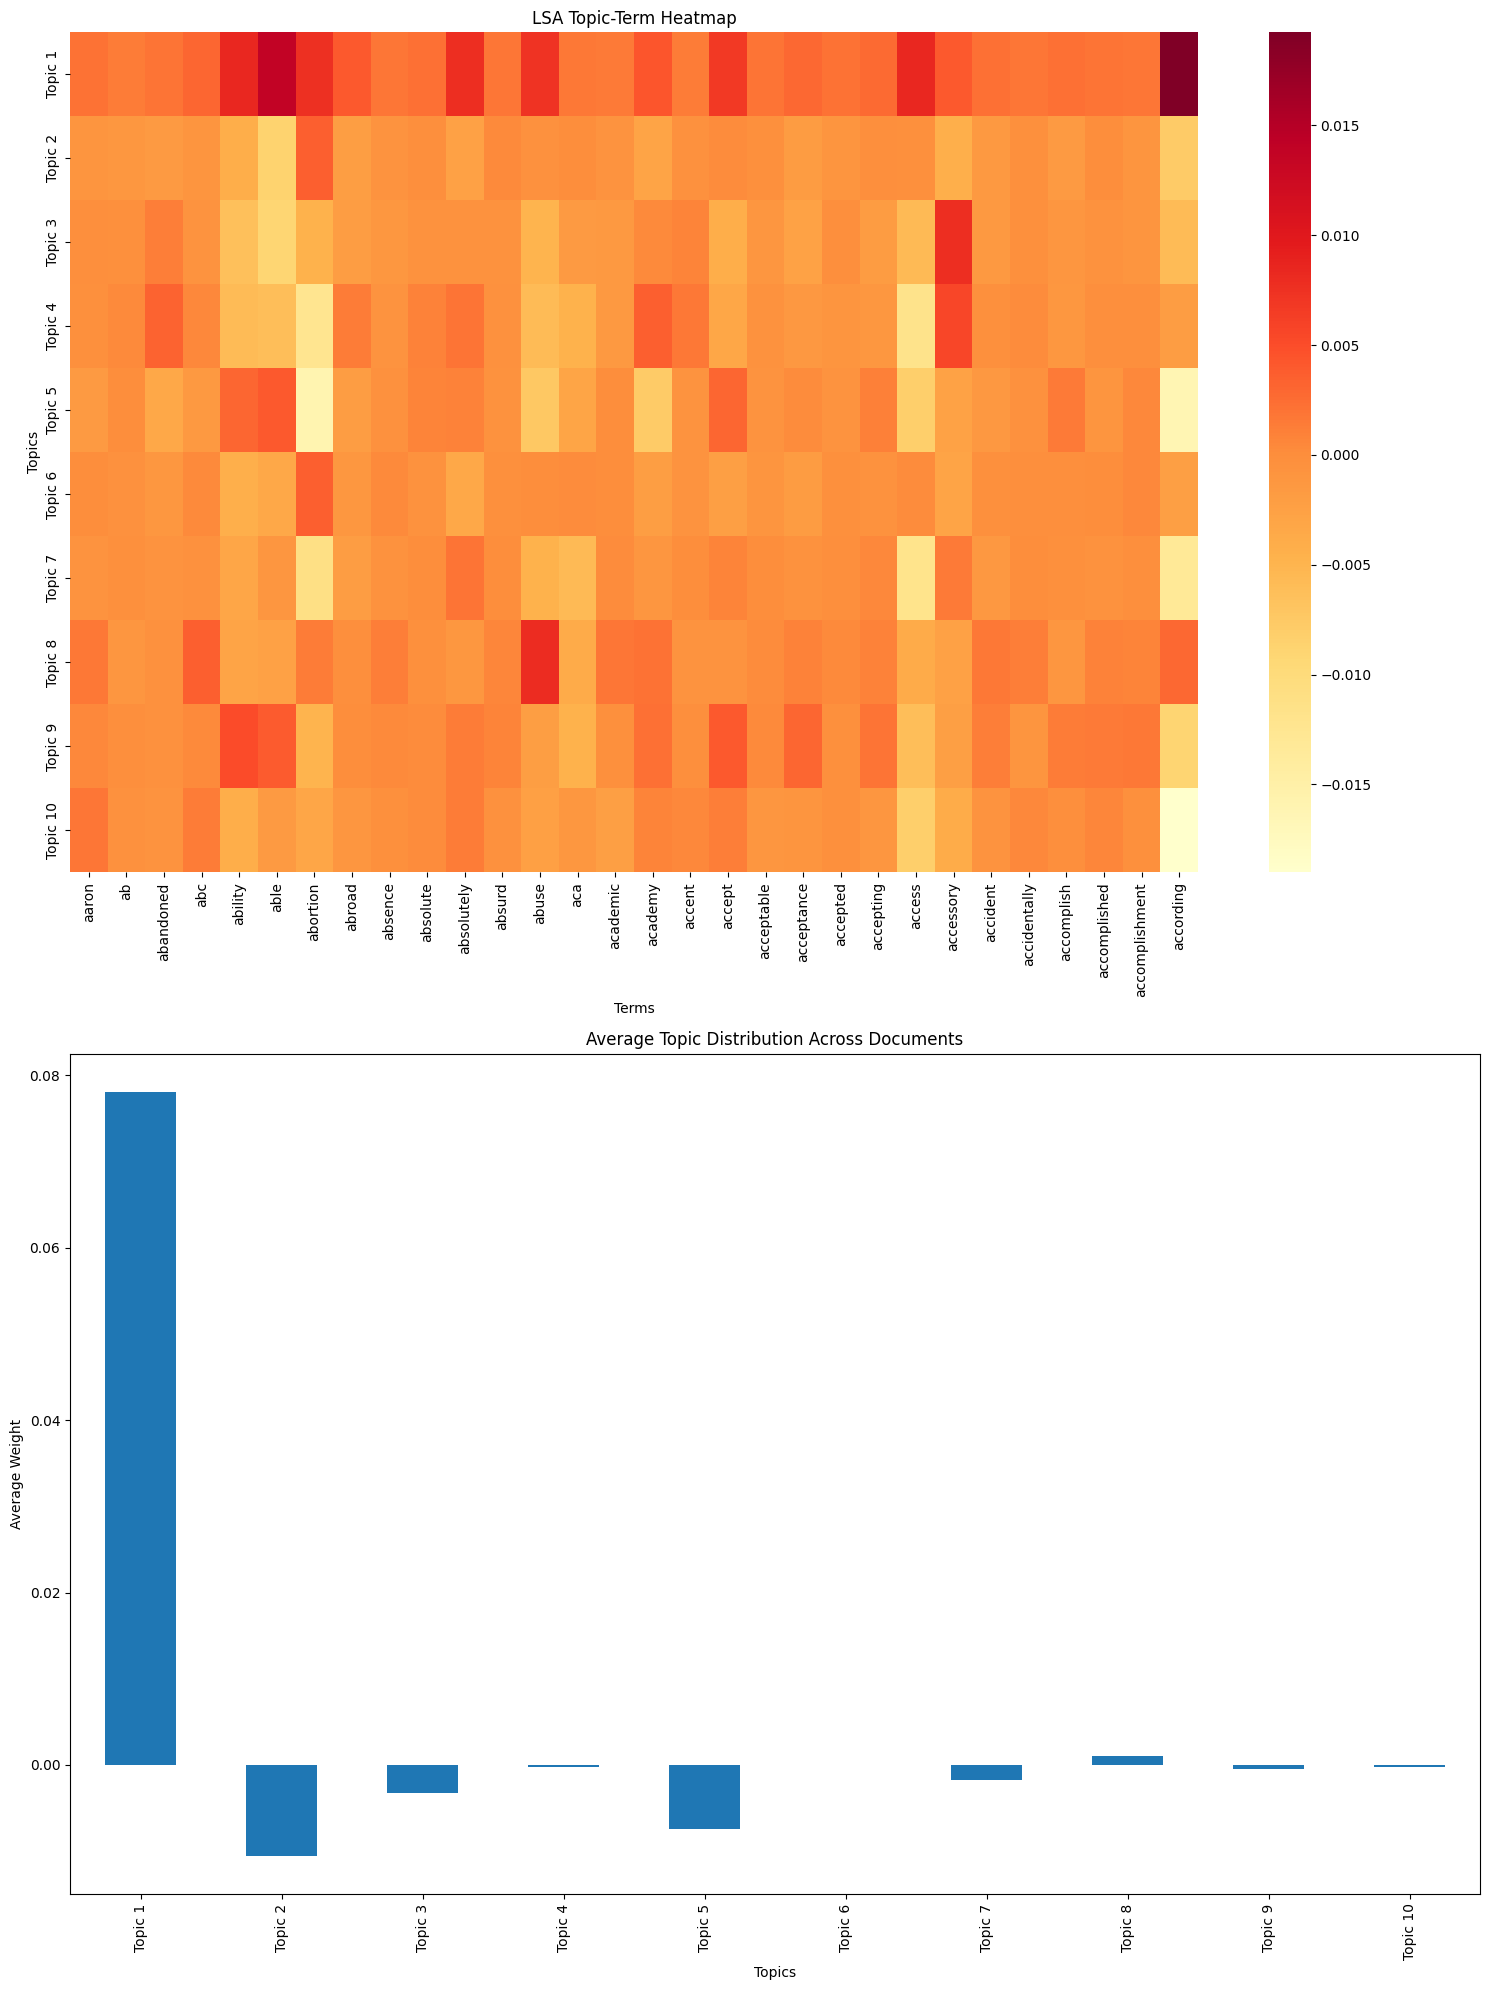

In [15]:
# LSA可视化
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

# 1. 主题-词语热力图
topic_term_matrix = lsa_model.components_
term_importance = pd.DataFrame(
    topic_term_matrix,
    columns=feature_names,
    index=[f"Topic {i+1}" for i in range(n_topics)]
)
sns.heatmap(term_importance.iloc[:, :30], cmap='YlOrRd', ax=axes[0])
axes[0].set_title('LSA Topic-Term Heatmap')
axes[0].set_xlabel('Terms')
axes[0].set_ylabel('Topics')

# 2. 文档-主题分布
doc_topic_dist = pd.DataFrame(
    lsa_output,
    columns=[f"Topic {i+1}" for i in range(n_topics)]
)
doc_topic_dist.mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Topic Distribution Across Documents')
axes[1].set_xlabel('Topics')
axes[1].set_ylabel('Average Weight')

plt.tight_layout()
plt.show()

In [16]:
# 2. LDA (Latent Dirichlet Allocation)
print("Training LDA model...")

# 创建词频矩阵
count_vectorizer = CountVectorizer(max_features=5000)
count_matrix = count_vectorizer.fit_transform(df['cleaned_text'])

# 训练LDA模型
lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=50
)
lda_output = lda_model.fit_transform(count_matrix)

# 获取主题词
feature_names = count_vectorizer.get_feature_names_out()
lda_topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    lda_topics[f"Topic {topic_idx+1}"] = top_words
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

Training LDA model...
Topic 1: health, study, care, cancer, sleep, risk, people, drug, disease
Topic 2: show, star, movie, film, music, video, watch, tv, actor
Topic 3: world, city, game, year, place, team, america, day, trip
Topic 4: day, food, get, know, youre, way, like, holiday, dont
Topic 5: photo, style, look, travel, fashion, home, check, week, facebook
Topic 6: trump, donald, president, republican, gop, clinton, obama, hillary, say
Topic 7: kid, parent, mom, baby, girl, week, video, mother, child
Topic 8: state, american, court, right, law, company, year, america, community
Topic 9: white, black, school, house, woman, police, gun, death, man
Topic 10: life, people, way, thing, dont, like, need, want, feel


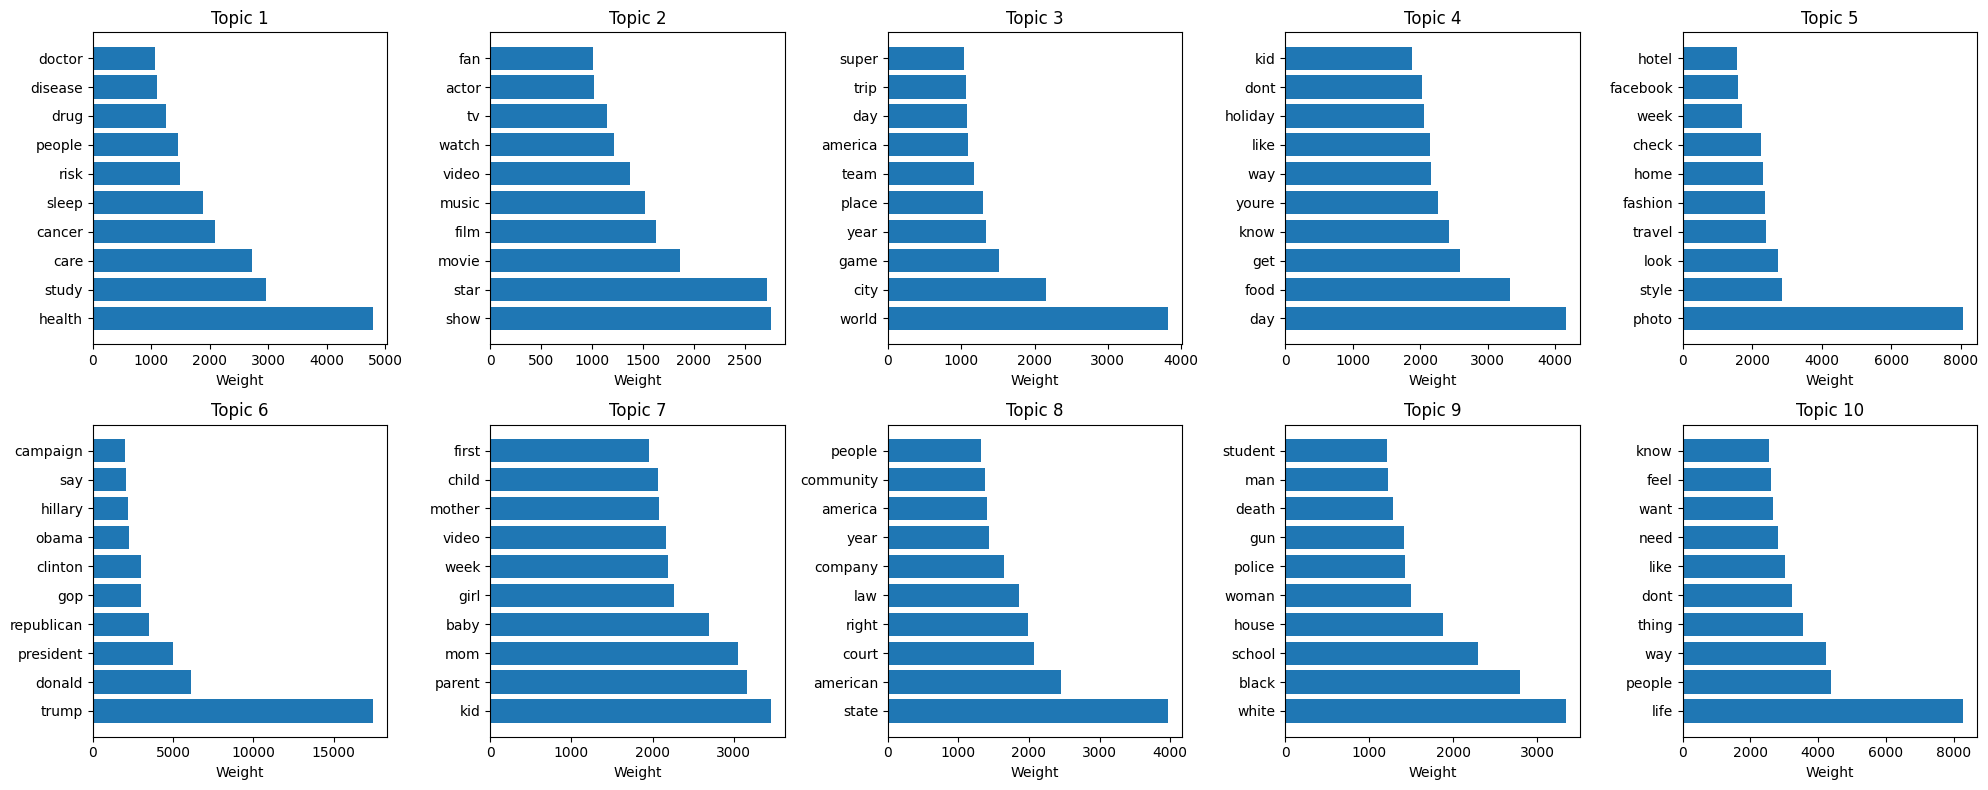

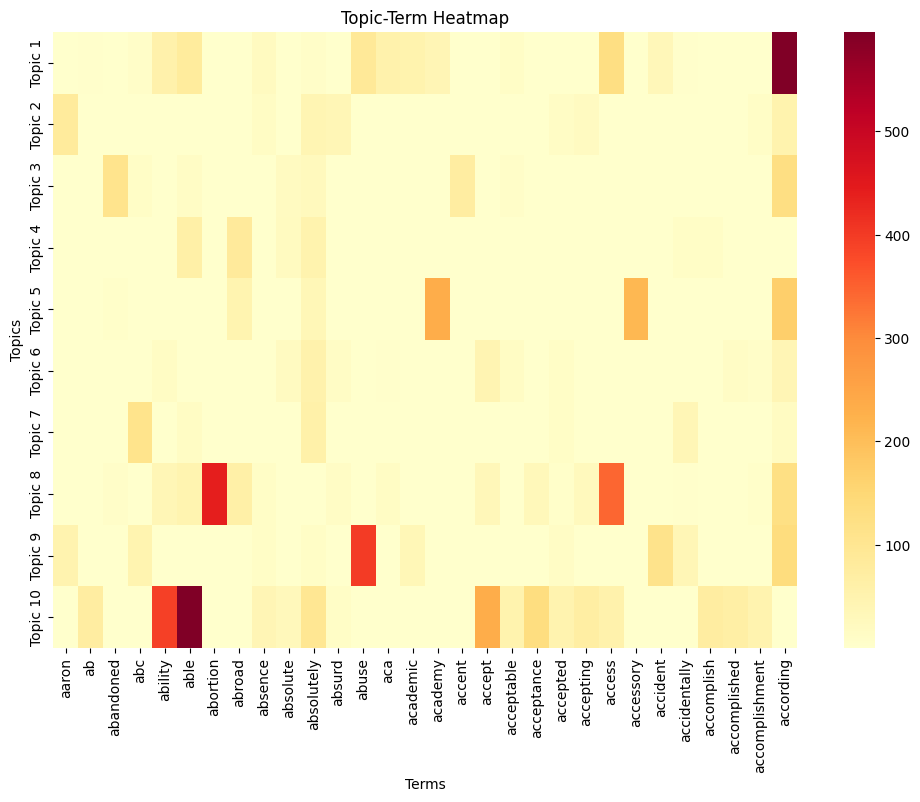

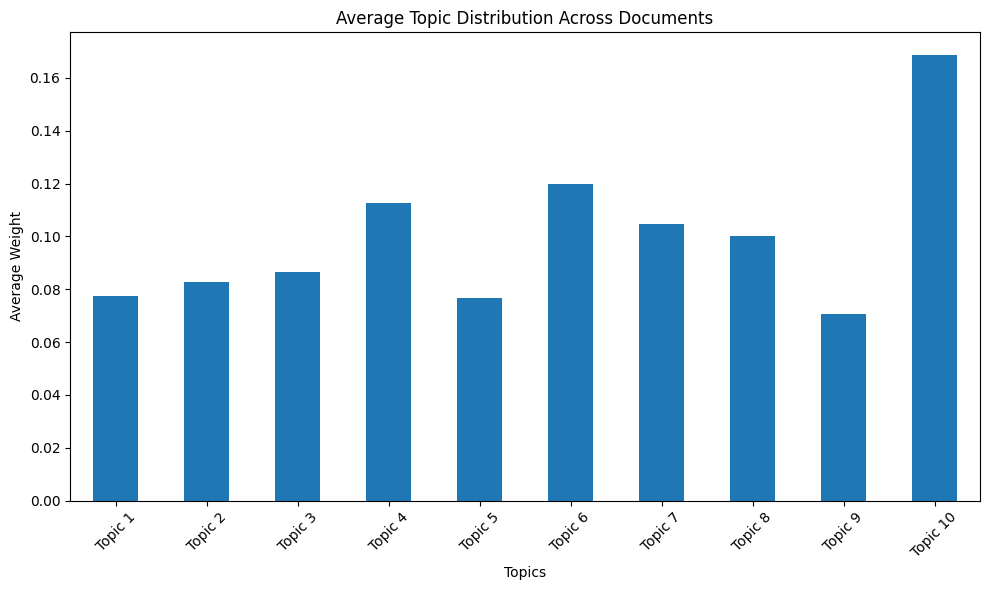

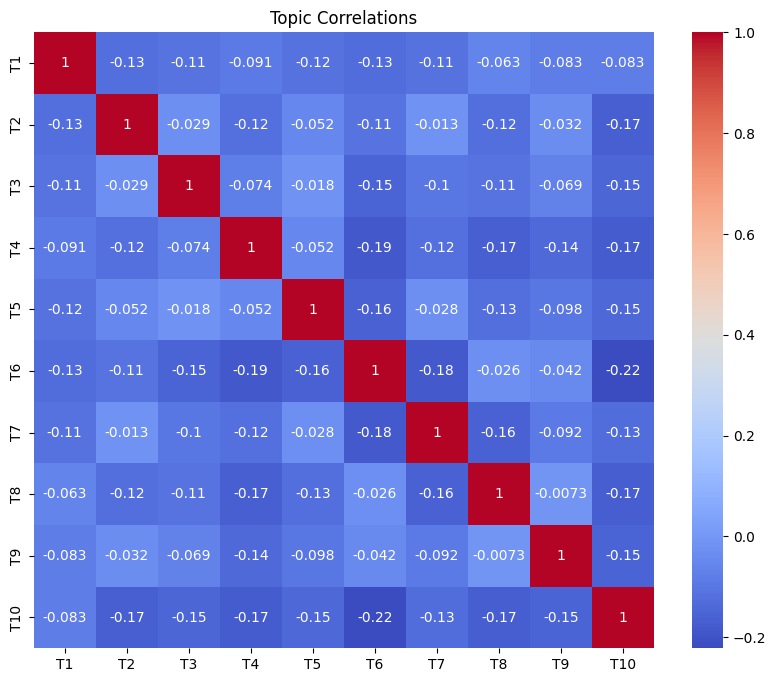


Top words in each topic:

Topic 1:
health, study, care, cancer, sleep, risk, people, drug, disease, doctor

Topic 2:
show, star, movie, film, music, video, watch, tv, actor, fan

Topic 3:
world, city, game, year, place, team, america, day, trip, super

Topic 4:
day, food, get, know, youre, way, like, holiday, dont, kid

Topic 5:
photo, style, look, travel, fashion, home, check, week, facebook, hotel

Topic 6:
trump, donald, president, republican, gop, clinton, obama, hillary, say, campaign

Topic 7:
kid, parent, mom, baby, girl, week, video, mother, child, first

Topic 8:
state, american, court, right, law, company, year, america, community, people

Topic 9:
white, black, school, house, woman, police, gun, death, man, student

Topic 10:
life, people, way, thing, dont, like, need, want, feel, know


In [21]:
def visualize_lda_results(lda_model, count_vectorizer, lda_output, n_words=10):
    # 1. 主题-词语分布可视化
    feature_names = count_vectorizer.get_feature_names_out()
    
    # 创建一个大图，包含所有主题
    n_topics = len(lda_model.components_)
    n_rows = (n_topics + 4) // 5  # 每行5个主题
    fig = plt.figure(figsize=(20, 4*n_rows))
    
    for i, topic in enumerate(lda_model.components_):
        plt.subplot(n_rows, 5, i + 1)
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        top_weights = topic[top_words_idx]
        
        plt.barh(top_words, top_weights)
        plt.title(f'Topic {i+1}')
        plt.xlabel('Weight')
    
    plt.tight_layout()
    plt.show()
    
    # 2. 主题分布热力图
    plt.figure(figsize=(12, 8))
    topic_term_matrix = pd.DataFrame(
        lda_model.components_,
        columns=feature_names,
        index=[f'Topic {i+1}' for i in range(n_topics)]
    )
    sns.heatmap(topic_term_matrix.iloc[:, :30], cmap='YlOrRd')
    plt.title('Topic-Term Heatmap')
    plt.xlabel('Terms')
    plt.ylabel('Topics')
    plt.show()
    
    # 3. 文档-主题分布
    doc_topics = pd.DataFrame(
        lda_output,
        columns=[f'Topic {i+1}' for i in range(n_topics)]
    )
    
    plt.figure(figsize=(10, 6))
    doc_topics.mean().plot(kind='bar')
    plt.title('Average Topic Distribution Across Documents')
    plt.xlabel('Topics')
    plt.ylabel('Average Weight')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 4. 主题相关性
    plt.figure(figsize=(10, 8))
    topic_corr = np.corrcoef(lda_output.T)
    sns.heatmap(
        topic_corr,
        annot=True,
        cmap='coolwarm',
        xticklabels=[f'T{i+1}' for i in range(n_topics)],
        yticklabels=[f'T{i+1}' for i in range(n_topics)]
    )
    plt.title('Topic Correlations')
    plt.show()
    
    # 5. 打印每个主题的关键词
    print("\nTop words in each topic:")
    for i, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[idx] for idx in top_words_idx]
        print(f"\nTopic {i+1}:")
        print(", ".join(top_words))

# 使用这个函数来可视化LDA结果
visualize_lda_results(lda_model, count_vectorizer, lda_output)

In [22]:
# 3. NMF (Non-negative Matrix Factorization)
print("Training NMF model...")

# 使用之前的TF-IDF矩阵
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_output = nmf_model.fit_transform(tfidf_matrix)

# 获取主题词
nmf_topics = {}
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    nmf_topics[f"Topic {topic_idx+1}"] = top_words
    print(f"Topic {topic_idx+1}: {', '.join(top_words)}")

Training NMF model...
Topic 1: photo, week, fashion, best, home, show, dress, style, star
Topic 2: trump, donald, president, campaign, he, say, tweet, administration, colbert
Topic 3: want, twitter, check, huffpost, facebook, pinterest, tumblr, style, sure
Topic 4: life, get, way, thing, know, dont, love, need, good
Topic 5: house, republican, white, state, gop, obama, say, president, bill
Topic 6: day, mother, recipe, rise, valentine, every, morning, huffpost, father
Topic 7: clinton, hillary, sander, bernie, campaign, democratic, email, presidential, debate
Topic 8: kid, child, parent, mom, school, family, baby, dad, parenting
Topic 9: year, health, woman, people, study, care, american, first, cancer
Topic 10: like, look, feel, back, really, here, sound, doesnt, hill


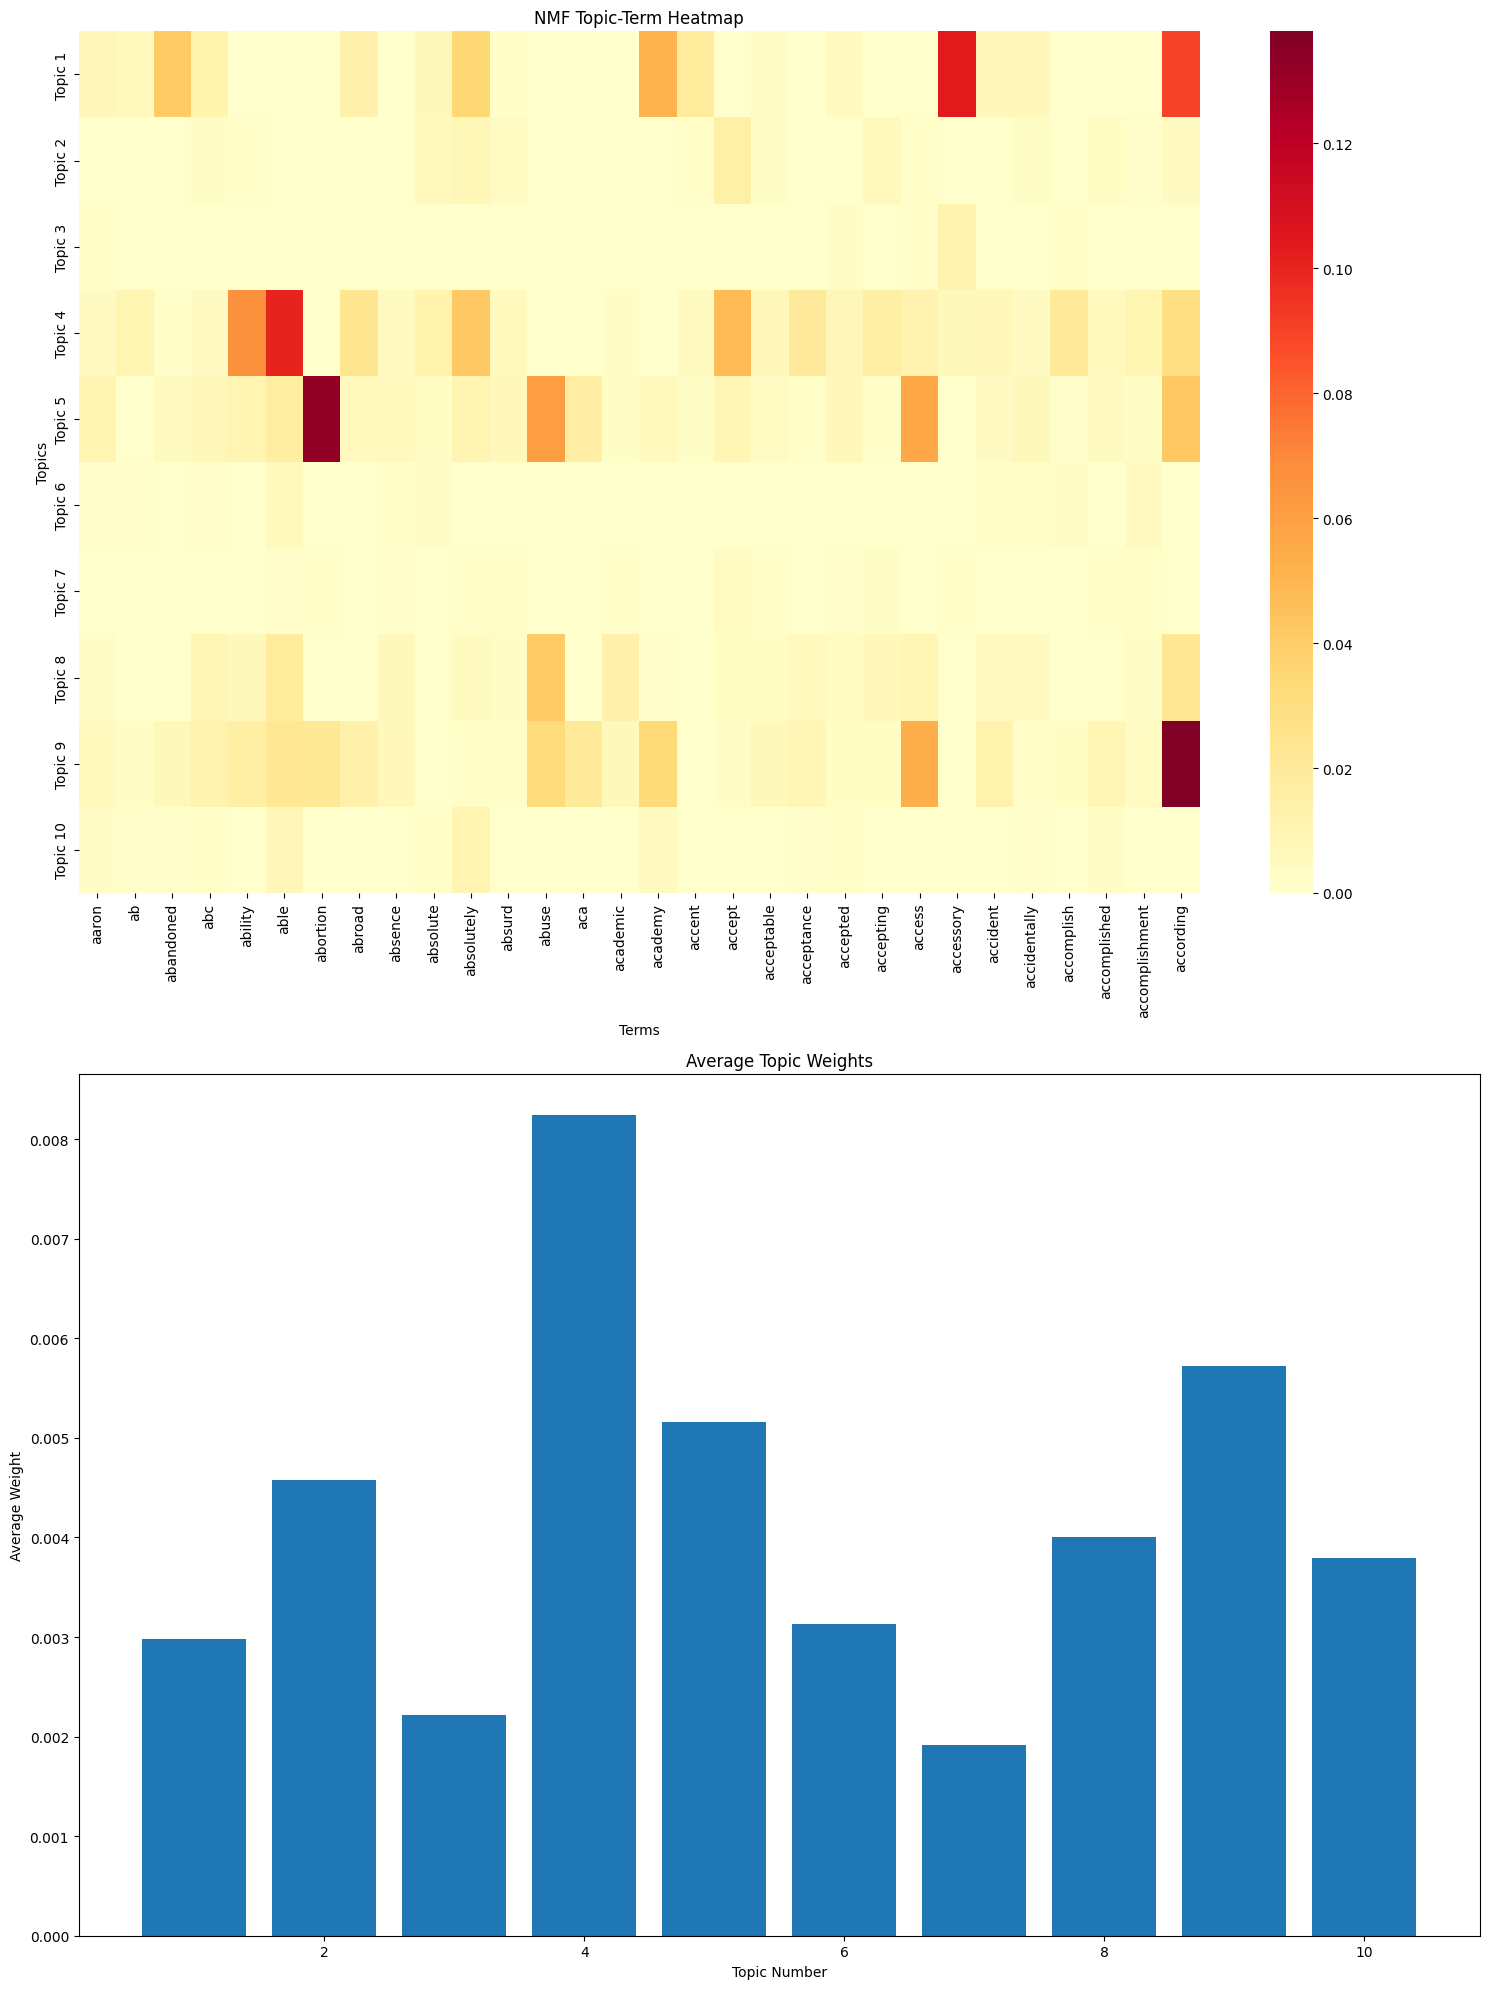

In [23]:
# NMF可视化
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

# 1. 主题-词语重要性
topic_term_matrix = nmf_model.components_
term_importance = pd.DataFrame(
    topic_term_matrix,
    columns=feature_names,
    index=[f"Topic {i+1}" for i in range(n_topics)]
)
sns.heatmap(term_importance.iloc[:, :30], cmap='YlOrRd', ax=axes[0])
axes[0].set_title('NMF Topic-Term Heatmap')
axes[0].set_xlabel('Terms')
axes[0].set_ylabel('Topics')

# 2. 主题分布
topic_distribution = nmf_output.mean(axis=0)
plt.bar(range(1, n_topics + 1), topic_distribution)
axes[1].set_title('Average Topic Weights')
axes[1].set_xlabel('Topic Number')
axes[1].set_ylabel('Average Weight')

plt.tight_layout()
plt.show()

In [7]:
# 4. BERTopic
print("Training BERTopic model...")

# 训练BERTopic模型
from bertopic import BERTopic
import torch
from tqdm.notebook import tqdm
import time

# 检查是否有可用的GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

bertopic_model = BERTopic(
    nr_topics=n_topics,
    verbose=True
)

start_time = time.time()
topics, probs = bertopic_model.fit_transform(
    df['cleaned_text'].tolist()
)
end_time = time.time()
print(f"\nTraining completed in {end_time - start_time:.2f} seconds")

# 获取主题信息
print("\nStep 5: Extracting topic information...")
bertopic_topics = bertopic_model.get_topic_info()
print("\nTop topics:")
print(bertopic_topics)

# 获取主题词
print("\nStep 6: Displaying topic keywords...")
for topic in tqdm(bertopic_model.get_topics(), desc="Processing topics"):
    if topic != -1:  # 跳过离群主题
        print(f"\nTopic {topic}:")
        print(bertopic_model.get_topic(topic))

2025-04-02 20:11:28,147 - BERTopic - Embedding - Transforming documents to embeddings.


Training BERTopic model...
Using device: cuda


Batches:   0%|          | 0/6548 [00:00<?, ?it/s]

2025-04-02 20:12:44,080 - BERTopic - Embedding - Completed ✓
2025-04-02 20:12:44,081 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-02 20:15:12,490 - BERTopic - Dimensionality - Completed ✓
2025-04-02 20:15:12,496 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-02 20:15:34,105 - BERTopic - Cluster - Completed ✓
2025-04-02 20:15:34,105 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-04-02 20:15:42,958 - BERTopic - Representation - Completed ✓
2025-04-02 20:15:42,961 - BERTopic - Topic reduction - Reducing number of topics
2025-04-02 20:15:43,216 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-02 20:15:46,045 - BERTopic - Representation - Completed ✓
2025-04-02 20:15:46,070 - BERTopic - Topic reduction - Reduced number of topics from 1706 to 10



Training completed in 258.13 seconds

Step 5: Extracting topic information...

Top topics:
   Topic   Count                                 Name  \
0     -1  104717             -1_trump_photo_life_year   
1      0   34908             0_photo_day_divorce_week   
2      1   28833  1_trump_donald_president_republican   
3      2   15350               2_sleep_life_child_day   
4      3    8515         3_trump_korea_iran_president   
5      4    7253             4_climate_dog_change_cat   
6      5    4303        5_cancer_marijuana_ebola_drug   
7      6    3682                6_game_bowl_super_win   
8      7    1898       7_airline_flight_plane_airport   
9      8      68       8_bridge_lloyd_wright_building   

                                      Representation  \
0  [trump, photo, life, year, day, like, people, ...   
1  [photo, day, divorce, week, wedding, best, lik...   
2  [trump, donald, president, republican, gop, sa...   
3  [sleep, life, child, day, kid, yoga, year, peo...   


Processing topics:   0%|          | 0/10 [00:00<?, ?it/s]


Topic 0:
[('photo', np.float64(0.027785166439180702)), ('day', np.float64(0.0162614887977622)), ('divorce', np.float64(0.015953569197073258)), ('week', np.float64(0.014593734080471857)), ('wedding', np.float64(0.014485456810591985)), ('best', np.float64(0.014376510233179266)), ('like', np.float64(0.013886333278207152)), ('get', np.float64(0.013374325157193601)), ('year', np.float64(0.012989852902137928)), ('look', np.float64(0.012408596432277081))]

Topic 1:
[('trump', np.float64(0.04872999232516125)), ('donald', np.float64(0.023663815811076867)), ('president', np.float64(0.017769778440137902)), ('republican', np.float64(0.01682375273087224)), ('gop', np.float64(0.014741928872508235)), ('say', np.float64(0.014123551374425045)), ('clinton', np.float64(0.013953981985450196)), ('bill', np.float64(0.013730355906471644)), ('woman', np.float64(0.013685613882872831)), ('people', np.float64(0.013680134238784093))]

Topic 2:
[('sleep', np.float64(0.026098951732183233)), ('life', np.float64(0.0

In [12]:
bertopic_model.visualize_hierarchy()


In [13]:
bertopic_model.visualize_topics()


In [15]:

bertopic_model.visualize_heatmap()

In [17]:
bertopic_model.visualize_barchart()

3. Sentiment Analysis

    3.1 Feature engineering (evolutionary algorithm optimization for feature selection)

    3.2 Model training（evolutionary algorithm Optimization for hyper-parameters selection

    3.3 Recommendation system based on sentiment.

#### Feature Engineering

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 设置随机种子
random.seed(42)
np.random.seed(42)

# 创建适应度和个体类型
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

class FeatureSelector:
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.toolbox = base.Toolbox()
        
    def setup_optimization(self):
        # 初始化TF-IDF
        self.vectorizer = TfidfVectorizer(max_features=5000)
        X = self.vectorizer.fit_transform(self.texts)
        self.feature_names = self.vectorizer.get_feature_names_out()
        
        # 设置特征选择参数
        self.toolbox.register("attr_bool", random.randint, 0, 1)
        self.toolbox.register("individual", tools.initRepeat, creator.Individual,
                            self.toolbox.attr_bool, n=len(self.feature_names))
        self.toolbox.register("population", tools.initRepeat, list, 
                            self.toolbox.individual)
        
        # 注册遗传操作
        self.toolbox.register("evaluate", self.evaluate_features)
        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
        
    def evaluate_features(self, individual):
        # 选择特征
        selected_features = [i for i, select in enumerate(individual) if select]
        if not selected_features:
            return 0,
        
        # 使用选定特征训练模型并返回性能分数
        X_selected = X[:, selected_features]
        clf = RandomForestClassifier(n_estimators=100)
        scores = cross_val_score(clf, X_selected, self.labels, cv=5)
        return np.mean(scores),
    
    def run_optimization(self, n_generations=50, population_size=50):
        # 创建初始种群
        pop = self.toolbox.population(n=population_size)
        
        # 记录最佳个体
        hof = tools.HallOfFame(1)
        
        # 记录统计信息
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)
        
        # 运行进化算法
        pop, log = algorithms.eaSimple(pop, self.toolbox, 
                                     cxpb=0.7,  # 交叉概率
                                     mutpb=0.2,  # 变异概率
                                     ngen=n_generations, 
                                     stats=stats, 
                                     halloffame=hof,
                                     verbose=True)
        
        return pop, log, hof

# 使用示例
print("Starting feature selection optimization...")
feature_selector = FeatureSelector(df['cleaned_text'], df['category'])
feature_selector.setup_optimization()
pop, log, hof = feature_selector.run_optimization()

# 获取最佳特征
best_features = [i for i, select in enumerate(hof[0]) if select]
selected_feature_names = feature_selector.feature_names[best_features]
print("\nSelected features:", len(selected_feature_names))

X_selected = feature_selector.X[:, best_features]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, df['category'], test_size=0.2, random_state=42
)

# 保存数据供后续使用
data_dict = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'selected_feature_names': selected_feature_names
}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制进化过程
plt.figure(figsize=(12, 6))
gen = log.select("gen")
fit_mins = log.select("min")
fit_avgs = log.select("avg")
fit_maxs = log.select("max")

plt.plot(gen, fit_mins, 'b-', label='Minimum Fitness')
plt.plot(gen, fit_avgs, 'r-', label='Average Fitness')
plt.plot(gen, fit_maxs, 'g-', label='Maximum Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of Feature Selection')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 特征重要性可视化
feature_importance = pd.DataFrame({
    'feature': selected_feature_names,
    'importance': np.abs(hof[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Selected Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Random Forest with Evo Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms
import numpy as np
import random

class RFHyperparameterOptimizer:
    def __init__(self, X, y):
        self.X = X  # 使用之前特征选择得到的X_selected
        self.y = y
        self.toolbox = base.Toolbox()
        
    def setup_optimization(self):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        # 定义超参数范围
        self.toolbox.register("n_estimators", random.randint, 50, 500)
        self.toolbox.register("max_depth", random.randint, 3, 20)
        self.toolbox.register("min_samples_split", random.randint, 2, 10)
        self.toolbox.register("min_samples_leaf", random.randint, 1, 5)
        
        def create_individual():
            return [
                self.toolbox.n_estimators(),
                self.toolbox.max_depth(),
                self.toolbox.min_samples_split(),
                self.toolbox.min_samples_leaf()
            ]
        
        self.toolbox.register("individual", tools.initIterate, creator.Individual, 
                            create_individual)
        self.toolbox.register("population", tools.initRepeat, list, 
                            self.toolbox.individual)
        
        # 注册遗传操作
        self.toolbox.register("evaluate", self.evaluate_hyperparameters)
        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
    
    def evaluate_hyperparameters(self, individual):
        n_estimators, max_depth, min_samples_split, min_samples_leaf = individual
        
        clf = RandomForestClassifier(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_split=int(min_samples_split),
            min_samples_leaf=int(min_samples_leaf),
            random_state=42
        )
        
        scores = cross_val_score(clf, self.X, self.y, cv=5)
        return np.mean(scores),
    
    def run_optimization(self, n_generations=30, population_size=30):
        pop = self.toolbox.population(n=population_size)
        hof = tools.HallOfFame(1)
        
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)
        
        pop, log = algorithms.eaSimple(pop, self.toolbox,
                                     cxpb=0.7,
                                     mutpb=0.2,
                                     ngen=n_generations,
                                     stats=stats,
                                     halloffame=hof,
                                     verbose=True)
        
        return pop, log, hof

# 使用优化后的特征训练模型
print("Starting RandomForest hyperparameter optimization...")
rf_optimizer = RFHyperparameterOptimizer(X_selected, df['category'])
rf_optimizer.setup_optimization()
rf_pop, rf_log, rf_hof = rf_optimizer.run_optimization()

# 使用最佳超参数训练最终模型
best_rf_params = rf_hof[0]
rf_model = RandomForestClassifier(
    n_estimators=int(best_rf_params[0]),
    max_depth=int(best_rf_params[1]),
    min_samples_split=int(best_rf_params[2]),
    min_samples_leaf=int(best_rf_params[3]),
    random_state=42
)

# 训练和评估
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, df['category'], test_size=0.2, random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("\nRandomForest Classification Report:")
print(classification_report(y_test, rf_pred))

#### TF-IDF + SVM

In [25]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from deap import base, creator, tools, algorithms
import numpy as np
import random

class SVMHyperparameterOptimizer:
    def __init__(self, data_dict):
        self.X = data_dict['X_train']
        self.y = data_dict['y_train']
        self.X_test = data_dict['X_test']
        self.y_test = data_dict['y_test']
        self.toolbox = base.Toolbox()
        
    def setup_optimization(self):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        # 定义超参数范围
        self.toolbox.register("C", random.uniform, 0.1, 10.0)  # 正则化参数
        self.toolbox.register("max_iter", random.randint, 1000, 5000)  # 最大迭代次数
        self.toolbox.register("tol", random.uniform, 1e-5, 1e-3)  # 收敛阈值
        
        def create_individual():
            return [
                self.toolbox.C(),
                self.toolbox.max_iter(),
                self.toolbox.tol()
            ]
        
        self.toolbox.register("individual", tools.initIterate, creator.Individual, 
                            create_individual)
        self.toolbox.register("population", tools.initRepeat, list, 
                            self.toolbox.individual)
        
        # 注册遗传操作
        self.toolbox.register("evaluate", self.evaluate_hyperparameters)
        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
    
    def evaluate_hyperparameters(self, individual):
        C, max_iter, tol = individual
        
        clf = LinearSVC(
            C=C,
            max_iter=int(max_iter),
            tol=tol,
            random_state=42
        )
        
        scores = cross_val_score(clf, self.X, self.y, cv=5)
        return np.mean(scores),
    
    def run_optimization(self, n_generations=30, population_size=30):
        pop = self.toolbox.population(n=population_size)
        hof = tools.HallOfFame(1)
        
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)
        
        pop, log = algorithms.eaSimple(pop, self.toolbox,
                                     cxpb=0.7,
                                     mutpb=0.2,
                                     ngen=n_generations,
                                     stats=stats,
                                     halloffame=hof,
                                     verbose=True)
        
        return pop, log, hof

# 使用优化后的特征训练模型
print("Starting SVM hyperparameter optimization...")
svm_optimizer = SVMHyperparameterOptimizer(data_dict)
svm_optimizer.setup_optimization()
svm_pop, svm_log, svm_hof = svm_optimizer.run_optimization()

# 使用最佳超参数训练最终模型
best_svm_params = svm_hof[0]
svm_model = LinearSVC(
    C=best_svm_params[0],
    max_iter=int(best_svm_params[1]),
    tol=best_svm_params[2],
    random_state=42
)

# 训练和评估
svm_model.fit(data_dict['X_train'], data_dict['y_train'])
svm_pred = svm_model.predict(data_dict['X_test'])
print("\nSVM Classification Report:")
print(classification_report(data_dict['y_test'], svm_pred))

#### Bert

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import LabelEncoder
from deap import base, creator, tools, algorithms
import numpy as np
import random

class BERTHyperparameterOptimizer:
    def __init__(self, data_dict, texts):
        self.texts = texts
        self.labels = data_dict['y_train']
        self.toolbox = base.Toolbox()
        
        # 初始化tokenizer
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.num_labels = len(np.unique(self.labels))
        
    def setup_optimization(self):
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)
        
        # 定义超参数范围
        self.toolbox.register("learning_rate", random.uniform, 1e-5, 5e-5)
        self.toolbox.register("batch_size", random.randint, 8, 32)
        self.toolbox.register("max_length", random.randint, 100, 200)
        self.toolbox.register("dropout_rate", random.uniform, 0.1, 0.3)
        
        def create_individual():
            return [
                self.toolbox.learning_rate(),
                self.toolbox.batch_size(),
                self.toolbox.max_length(),
                self.toolbox.dropout_rate()
            ]
        
        self.toolbox.register("individual", tools.initIterate, creator.Individual, 
                            create_individual)
        self.toolbox.register("population", tools.initRepeat, list, 
                            self.toolbox.individual)
        
        # 注册遗传操作
        self.toolbox.register("evaluate", self.evaluate_hyperparameters)
        self.toolbox.register("mate", tools.cxTwoPoint)
        self.toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
        self.toolbox.register("select", tools.selTournament, tournsize=3)
    
    def prepare_data(self, max_length, batch_size):
        # Tokenize数据
        encodings = self.tokenizer(
            self.texts.tolist(),
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )
        
        # 创建数据集
        dataset = TensorDataset(
            encodings['input_ids'],
            encodings['attention_mask'],
            torch.tensor(self.labels)
        )
        
        # 创建数据加载器
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True
        )
        
        return dataloader
    
    def evaluate_hyperparameters(self, individual):
        learning_rate, batch_size, max_length, dropout_rate = individual
        
        # 准备数据
        dataloader = self.prepare_data(int(max_length), int(batch_size))
        
        # 初始化模型
        model = BertForSequenceClassification.from_pretrained(
            'bert-base-uncased',
            num_labels=self.num_labels
        )
        model.config.hidden_dropout_prob = dropout_rate
        
        # 设置设备
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        
        # 设置优化器
        optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
        
        # 训练模型
        model.train()
        total_loss = 0
        for batch in dataloader:
            optimizer.zero_grad()
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        return -total_loss / len(dataloader),  # 使用负损失作为适应度
    
    def run_optimization(self, n_generations=20, population_size=20):
        pop = self.toolbox.population(n=population_size)
        hof = tools.HallOfFame(1)
        
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)
        
        pop, log = algorithms.eaSimple(pop, self.toolbox,
                                     cxpb=0.7,
                                     mutpb=0.2,
                                     ngen=n_generations,
                                     stats=stats,
                                     halloffame=hof,
                                     verbose=True)
        
        return pop, log, hof

# 使用优化后的特征训练模型
print("Starting BERT hyperparameter optimization...")
bert_optimizer = BERTHyperparameterOptimizer(data_dict, df['cleaned_text'])
bert_optimizer.setup_optimization()
bert_pop, bert_log, bert_hof = bert_optimizer.run_optimization()

# 使用最佳超参数训练最终模型
best_bert_params = bert_hof[0]
bert_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=bert_optimizer.num_labels
)
bert_model.config.hidden_dropout_prob = best_bert_params[3]

# 准备最终训练数据
final_dataloader = bert_optimizer.prepare_data(
    int(best_bert_params[2]),
    int(best_bert_params[1])
)

# 训练最终模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model.to(device)
optimizer = torch.optim.AdamW(bert_model.parameters(), lr=best_bert_params[0])

# 训练循环
bert_model.train()
for epoch in range(3):
    for batch in final_dataloader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = bert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# 评估模型
bert_model.eval()
test_encodings = bert_optimizer.tokenizer(
    df['cleaned_text'].iloc[data_dict['X_test'].index].tolist(),
    truncation=True,
    padding=True,
    max_length=int(best_bert_params[2]),
    return_tensors='pt'
)

test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask']
)
test_loader = DataLoader(test_dataset, batch_size=int(best_bert_params[1]))

bert_pred = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        outputs = bert_model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
        bert_pred.extend(predictions.cpu().numpy())

print("\nBERT Classification Report:")
print(classification_report(data_dict['y_test'], bert_pred))

#### Model Compare

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 混淆矩阵比较
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# RandomForest混淆矩阵
cm_rf = confusion_matrix(data_dict['y_test'], rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('RandomForest Confusion Matrix')

# SVM混淆矩阵
cm_svm = confusion_matrix(data_dict['y_test'], svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')

# BERT混淆矩阵
cm_bert = confusion_matrix(data_dict['y_test'], bert_pred)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('BERT Confusion Matrix')

plt.tight_layout()
plt.show()

# 模型性能比较
models = ['RandomForest', 'SVM', 'BERT']
rf_report = classification_report(data_dict['y_test'], rf_pred, output_dict=True)
svm_report = classification_report(data_dict['y_test'], svm_pred, output_dict=True)
bert_report = classification_report(data_dict['y_test'], bert_pred, output_dict=True)

accuracies = [
    rf_report['accuracy'],
    svm_report['accuracy'],
    bert_report['accuracy']
]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#### Recommendation System

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from torch.utils.data import DataLoader, TensorDataset
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

class NewsRecommender:
    def __init__(self, df):
        self.df = df
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # 初始化BERT tokenizer和模型
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.num_labels = len(df['category'].unique())
        
        # 初始化情感分析模型
        self.sentiment_analyzer = pipeline(
            "sentiment-analysis",
            model="ProsusAI/finbert",  # 使用金融新闻专用的BERT模型
            device=0 if torch.cuda.is_available() else -1
        )
        
        # 初始化BERT分类模型
        self.bert_model = BertForSequenceClassification.from_pretrained(
            'bert-base-uncased',
            num_labels=self.num_labels
        ).to(self.device)
        
        # 标签编码器
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(df['category'])
        
    def prepare_data(self, texts, max_length=200, batch_size=32):
        # Tokenize数据
        encodings = self.tokenizer(
            texts.tolist(),
            truncation=True,
            padding=True,
            max_length=max_length,
            return_tensors='pt'
        )
        
        # 创建数据集
        dataset = TensorDataset(
            encodings['input_ids'],
            encodings['attention_mask']
        )
        
        # 创建数据加载器
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=False
        )
        
        return dataloader
    
    def get_bert_embeddings(self, texts):
        """获取BERT的文本嵌入"""
        dataloader = self.prepare_data(texts)
        embeddings = []
        
        self.bert_model.eval()
        with torch.no_grad():
            for batch in dataloader:
                input_ids = batch[0].to(self.device)
                attention_mask = batch[1].to(self.device)
                
                outputs = self.bert_model(input_ids, attention_mask=attention_mask)
                # 使用最后一层的[CLS]token的输出作为文本表示
                embeddings.append(outputs.hidden_states[-1][:, 0, :].cpu().numpy())
        
        return np.vstack(embeddings)
    
    def get_sentiment_scores(self, texts):
        """获取情感分析分数"""
        sentiments = []
        for text in texts:
            result = self.sentiment_analyzer(text[:512])[0]  # 限制文本长度
            sentiments.append(result['score'])
        return np.array(sentiments)
    
    def train_bert(self, train_texts, train_labels, epochs=3):
        """训练BERT分类模型"""
        train_dataloader = self.prepare_data(train_texts)
        optimizer = torch.optim.AdamW(self.bert_model.parameters(), lr=2e-5)
        
        self.bert_model.train()
        for epoch in range(epochs):
            total_loss = 0
            for batch in train_dataloader:
                optimizer.zero_grad()
                input_ids = batch[0].to(self.device)
                attention_mask = batch[1].to(self.device)
                labels = torch.tensor(train_labels).to(self.device)
                
                outputs = self.bert_model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_dataloader):.4f}")
    
    def recommend(self, article_id, n_recommendations=5):
        """基于BERT嵌入和情感分析进行推荐"""
        # 获取所有文章的BERT嵌入
        all_embeddings = self.get_bert_embeddings(self.df['cleaned_text'])
        
        # 获取所有文章的情感分数
        all_sentiments = self.get_sentiment_scores(self.df['cleaned_text'])
        
        # 计算相似度
        target_embedding = all_embeddings[article_id]
        target_sentiment = all_sentiments[article_id]
        
        # 计算BERT嵌入的余弦相似度
        bert_similarities = cosine_similarity([target_embedding], all_embeddings)[0]
        
        # 计算情感相似度
        sentiment_similarities = 1 - np.abs(all_sentiments - target_sentiment)
        
        # 综合相似度分数
        combined_scores = 0.7 * bert_similarities + 0.3 * sentiment_similarities
        
        # 获取推荐文章的索引
        recommended_indices = np.argsort(combined_scores)[-n_recommendations-1:-1][::-1]
        
        # 获取推荐结果
        recommendations = []
        for idx in recommended_indices:
            recommendations.append({
                'article_id': idx,
                'title': self.df.iloc[idx]['headline'],
                'category': self.df.iloc[idx]['category'],
                'sentiment_score': all_sentiments[idx],
                'similarity_score': combined_scores[idx]
            })
        
        return recommendations

# 使用示例
print("Initializing recommendation system...")
recommender = NewsRecommender(df)

# 训练BERT模型
print("\nTraining BERT model...")
train_texts = df['cleaned_text']
train_labels = recommender.label_encoder.transform(df['category'])
recommender.train_bert(train_texts, train_labels)

# 为第一篇文章生成推荐
article_id = 0
recommendations = recommender.recommend(article_id)

print("\nOriginal article:")
print(f"Title: {df.iloc[article_id]['headline']}")
print(f"Category: {df.iloc[article_id]['category']}")
print(f"Sentiment: {recommender.get_sentiment_scores([df.iloc[article_id]['cleaned_text']])[0]:.2f}")

print("\nRecommended articles:")
for rec in recommendations:
    print(f"\nTitle: {rec['title']}")
    print(f"Category: {rec['category']}")
    print(f"Sentiment: {rec['sentiment_score']:.2f}")
    print(f"Similarity: {rec['similarity_score']:.2f}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

def visualize_recommendations(article_id, recommendations, df):
    # 创建图形
    fig = plt.figure(figsize=(15, 10))
    
    # 1. 情感分布对比
    plt.subplot(2, 2, 1)
    original_sentiment = recommender.get_sentiment_scores([df.iloc[article_id]['cleaned_text']])[0]
    rec_sentiments = [rec['sentiment_score'] for rec in recommendations]
    
    plt.bar(['Original'] + [f'Rec {i+1}' for i in range(len(recommendations))],
            [original_sentiment] + rec_sentiments)
    plt.title('Sentiment Comparison')
    plt.ylabel('Sentiment Score')
    plt.xticks(rotation=45)
    
    # 2. 相似度分数分布
    plt.subplot(2, 2, 2)
    rec_similarities = [rec['similarity_score'] for rec in recommendations]
    plt.bar(range(1, len(recommendations) + 1), rec_similarities)
    plt.title('Similarity Scores')
    plt.xlabel('Recommendation Rank')
    plt.ylabel('Similarity Score')
    
    # 3. 类别分布
    plt.subplot(2, 2, 3)
    original_category = df.iloc[article_id]['category']
    rec_categories = [rec['category'] for rec in recommendations]
    
    category_counts = pd.Series([original_category] + rec_categories).value_counts()
    category_counts.plot(kind='bar')
    plt.title('Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # 4. 关键词词云
    plt.subplot(2, 2, 4)
    text = ' '.join([df.iloc[article_id]['cleaned_text']] + 
                    [df.iloc[rec['article_id']]['cleaned_text'] for rec in recommendations])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Keywords in Articles')
    
    plt.tight_layout()
    plt.show()

# 可视化推荐结果
visualize_recommendations(0, recommendations, df)

# 情感分布可视化
plt.figure(figsize=(10, 6))
all_sentiments = recommender.get_sentiment_scores(df['cleaned_text'])
sns.histplot(all_sentiments, bins=50)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# 类别-情感关系可视化
plt.figure(figsize=(12, 6))
df['sentiment_score'] = all_sentiments
sns.boxplot(data=df, x='category', y='sentiment_score')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Category classification

* TF-IDF + SVM
* BERT

In [18]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

print("Training TF-IDF + SVM model...")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], 
    df['category'], 
    test_size=0.2, 
    random_state=42,
    stratify=df['category']
)

# 创建pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LinearSVC(random_state=42))
])

# 训练模型
svm_pipeline.fit(X_train, y_train)

# 预测和评估
y_pred_svm = svm_pipeline.predict(X_test)

# 打印分类报告
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# 保存结果用于可视化
svm_results = {
    'y_true': y_test,
    'y_pred': y_pred_svm,
    'model_name': 'SVM'
}

Training TF-IDF + SVM model...

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.29      0.18      0.22       302
ARTS & CULTURE       0.27      0.16      0.20       268
  BLACK VOICES       0.44      0.32      0.37       917
      BUSINESS       0.47      0.41      0.44      1198
       COLLEGE       0.41      0.37      0.39       229
        COMEDY       0.56      0.39      0.46      1080
         CRIME       0.49      0.54      0.52       712
CULTURE & ARTS       0.41      0.23      0.29       215
       DIVORCE       0.75      0.68      0.71       685
     EDUCATION       0.41      0.34      0.37       203
 ENTERTAINMENT       0.57      0.70      0.63      3473
   ENVIRONMENT       0.42      0.27      0.33       289
         FIFTY       0.35      0.16      0.22       280
  FOOD & DRINK       0.57      0.69      0.62      1268
     GOOD NEWS       0.26      0.17      0.21       280
         GREEN       0.37      0.31      0.34   

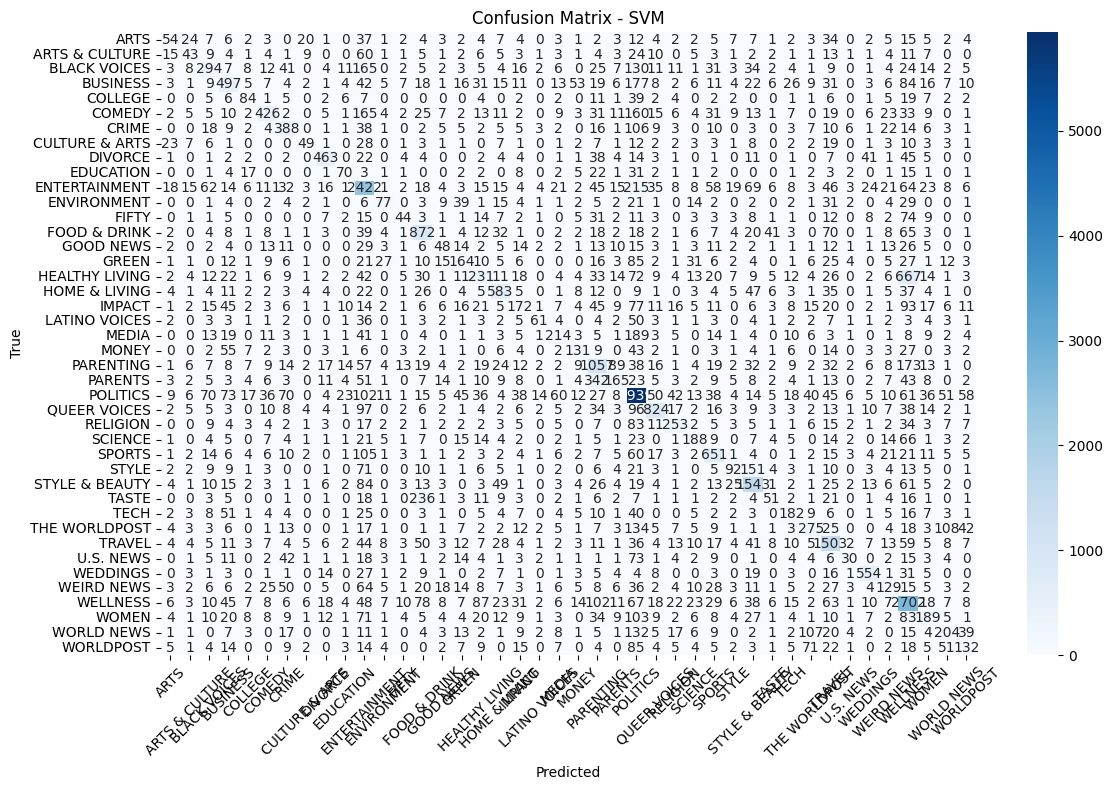

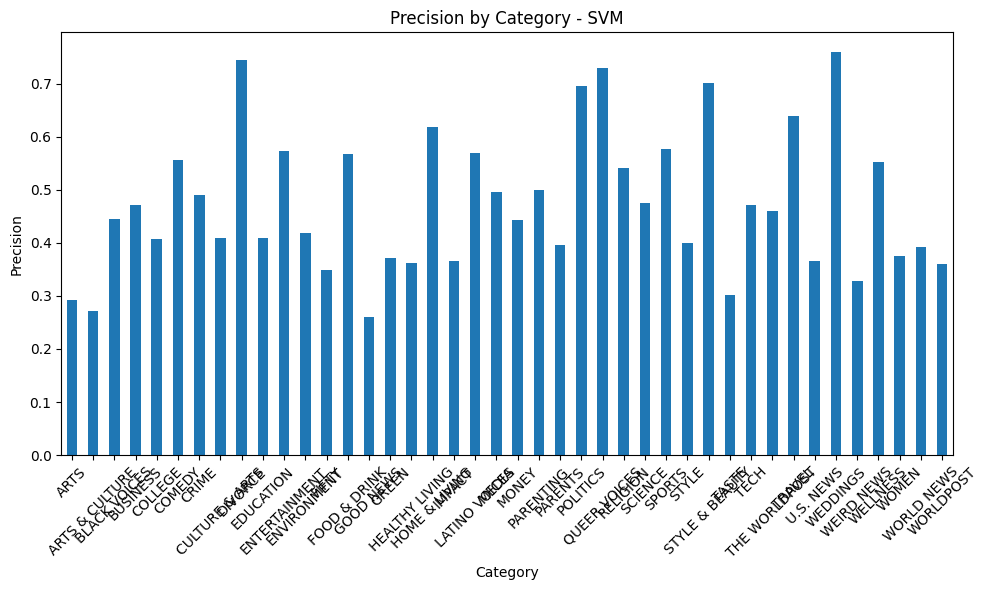

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 混淆矩阵可视化
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_pipeline.classes_,
            yticklabels=svm_pipeline.classes_)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 每个类别的准确率可视化
class_report = classification_report(y_test, y_pred_svm, output_dict=True)
class_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(10, 6))
class_df['precision'].iloc[:-3].plot(kind='bar')
plt.title('Precision by Category - SVM')
plt.xlabel('Category')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import LabelEncoder

print("Training BERT model...")

# 初始化tokenizer和模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
num_labels = len(df['category'].unique())
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
                                                     num_labels=num_labels)

# 标签编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])

# 准备数据
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], 
    y_encoded,
    test_size=0.2, 
    random_state=42,
    stratify=y_encoded
)

# Tokenize数据
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512)

# 创建数据加载器
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train)
)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# 训练模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# 训练循环
model.train()
for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# 评估
model.eval()
test_dataset = TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask'])
)
test_loader = DataLoader(test_dataset, batch_size=16)

y_pred_bert = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=-1)
        y_pred_bert.extend(predictions.cpu().numpy())

# 转换回原始标签
y_pred_bert = label_encoder.inverse_transform(y_pred_bert)
y_test_original = label_encoder.inverse_transform(y_test)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_bert))

# 保存结果用于可视化
bert_results = {
    'y_true': y_test_original,
    'y_pred': y_pred_bert,
    'model_name': 'BERT'
}

Training BERT model...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 混淆矩阵可视化
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_original, y_pred_bert)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - BERT')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 学习曲线可视化（如果在训练过程中保存了loss）
# 这里需要在训练循环中记录loss值
if 'training_losses' in locals():
    plt.figure(figsize=(10, 6))
    plt.plot(training_losses)
    plt.title('BERT Training Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.show()